In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

from skimage import measure
from skimage.draw import ellipsoid
import pyvista as pv

The Marching Cubes algorithm is used to extract a 2D surface mesh from a 3D volume.
The Marching Cubes algorithm creates a boundary where the voxel values cross the isosurface threshold.

 Here's a quick breakdown:

Volume Data: This is a 3D scalar field, meaning it's a 3D grid where each point (or voxel) has a scalar value. Think of it like a 3D image where each voxel represents some measurement, like density in a CT scan.

Isosurface Values: This is the specific scalar value you're interested in. The algorithm looks for regions in the volume data where the scalar value crosses this threshold. The surface that separates regions with scalar values above and below this threshold is called the isosurface.

In [27]:
# Generate a level set about zero of two identical ellipsoids in 3D
ellip_base = ellipsoid(6, 10, 16, levelset=True)
ellip_double = np.concatenate((ellip_base[:-1, ...], ellip_base[2:, ...]), axis=0)

# Use marching cubes to obtain the surface mesh of these ellipsoids
verts, faces, normals, values = measure.marching_cubes(ellip_double, 0)

In [29]:
ellip_double

array([[[2.70001736, 2.57111111, 2.45001736, ..., 2.45001736,
         2.57111111, 2.70001736],
        [2.49001736, 2.36111111, 2.24001736, ..., 2.24001736,
         2.36111111, 2.49001736],
        [2.30001736, 2.17111111, 2.05001736, ..., 2.05001736,
         2.17111111, 2.30001736],
        ...,
        [2.30001736, 2.17111111, 2.05001736, ..., 2.05001736,
         2.17111111, 2.30001736],
        [2.49001736, 2.36111111, 2.24001736, ..., 2.24001736,
         2.36111111, 2.49001736],
        [2.70001736, 2.57111111, 2.45001736, ..., 2.45001736,
         2.57111111, 2.70001736]],

       [[2.33890625, 2.21      , 2.08890625, ..., 2.08890625,
         2.21      , 2.33890625],
        [2.12890625, 2.        , 1.87890625, ..., 1.87890625,
         2.        , 2.12890625],
        [1.93890625, 1.81      , 1.68890625, ..., 1.68890625,
         1.81      , 1.93890625],
        ...,
        [1.93890625, 1.81      , 1.68890625, ..., 1.68890625,
         1.81      , 1.93890625],
        [2.1

The measure.marching_cubes method in scikit-image takes the following inputs:

    Volume Data: A 3D numpy array representing the scalar field (volume data).

    Isosurface Value: A scalar value that defines the threshold for the isosurface.

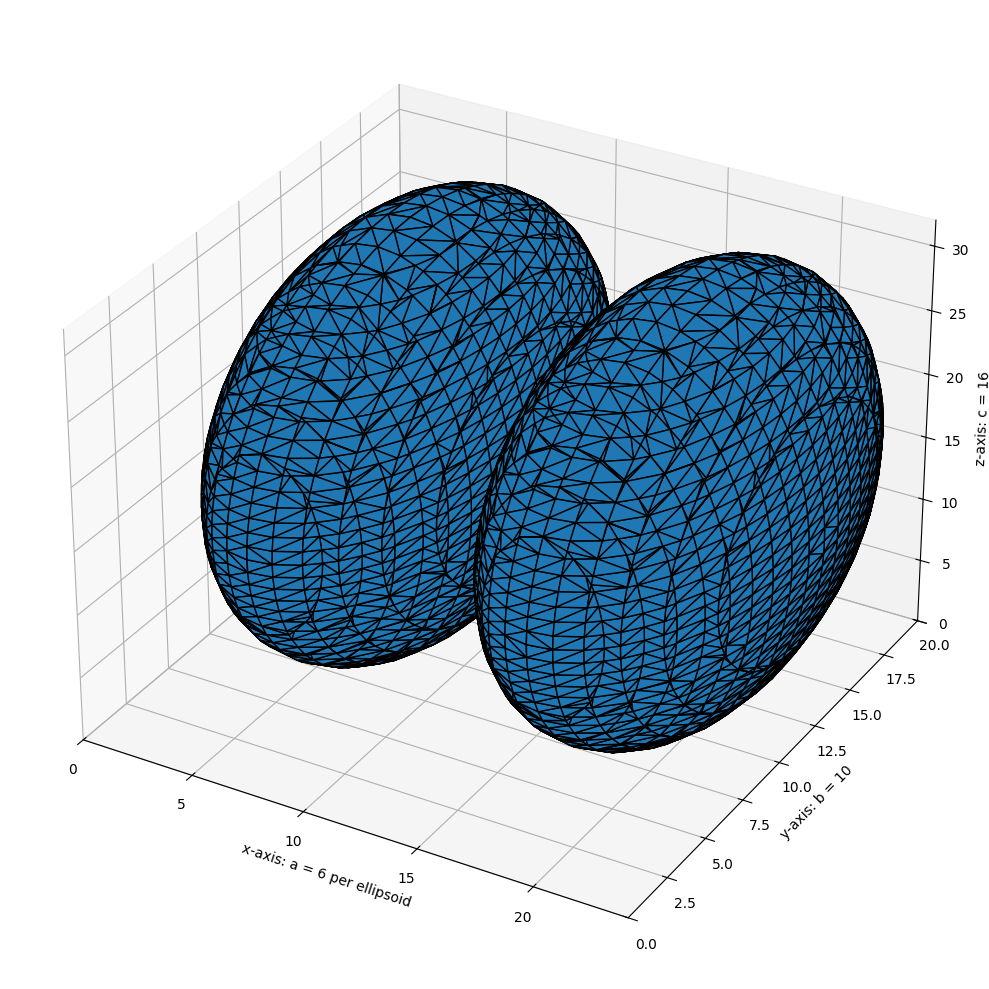

In [10]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 24)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 20)  # b = 10
ax.set_zlim(0, 32)  # c = 16

plt.tight_layout()
plt.show()

In [33]:
# Volume data
volume_data = np.random.rand(50, 50, 50)

# Isosurface value
iso_value = 0.05

# Extract the isosurface
vertices, faces, normals, values = measure.marching_cubes(volume_data, iso_value)

/home/kiyoshi/topology/lib/python3.12/site-packages/pyvista/jupyter/notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


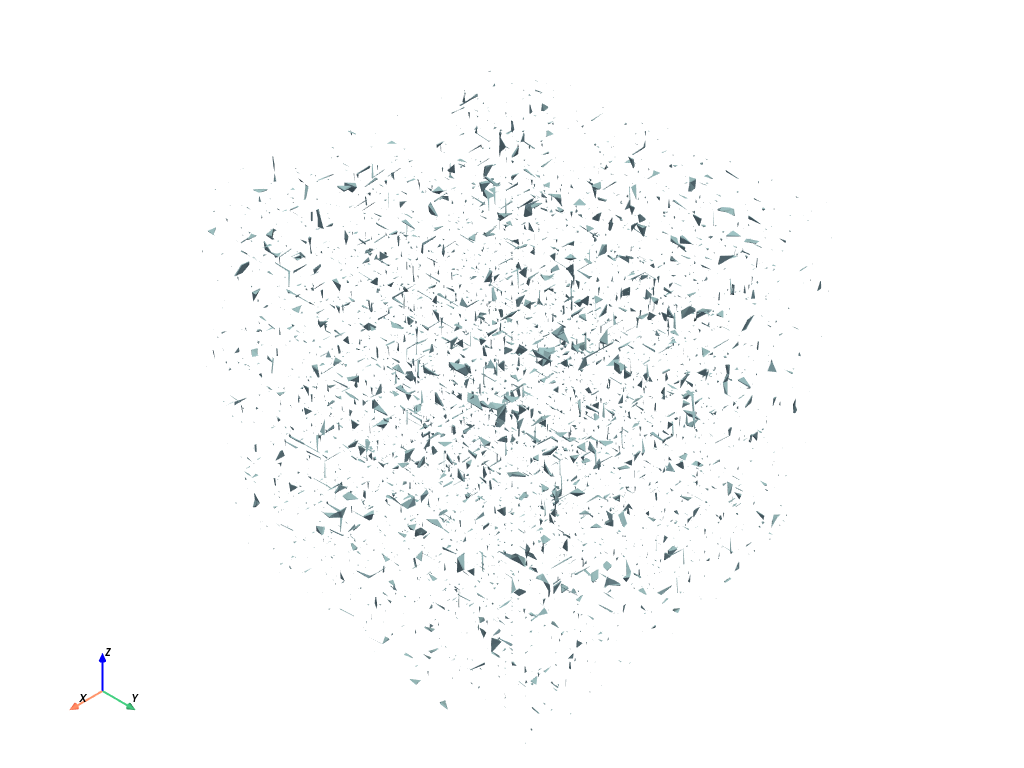

In [39]:
# Adjust faces array for PyVista
faces_pv = np.column_stack([np.full(len(faces), 3), faces])

# Create a PyVista mesh
mesh = pv.PolyData(vertices, faces_pv)

# Visualize the mesh
mesh.plot()

In [35]:
volume_data

array([[[0.99864004, 0.22519796, 0.61201675, ..., 0.07393373,
         0.5148639 , 0.77911837],
        [0.16875218, 0.98654058, 0.62636468, ..., 0.34274689,
         0.44755938, 0.12026509],
        [0.80816796, 0.81509023, 0.16472864, ..., 0.53936914,
         0.44677491, 0.43325628],
        ...,
        [0.45207727, 0.30015946, 0.03435499, ..., 0.86057701,
         0.71776369, 0.26518173],
        [0.54568403, 0.52248023, 0.17024139, ..., 0.33995491,
         0.51855997, 0.30351431],
        [0.2278615 , 0.68619549, 0.99727389, ..., 0.18035734,
         0.09318678, 0.48595668]],

       [[0.57827409, 0.9152929 , 0.23711167, ..., 0.13133809,
         0.73657113, 0.08011638],
        [0.06535902, 0.02044015, 0.52677159, ..., 0.71391343,
         0.60519984, 0.52087677],
        [0.31028809, 0.44587013, 0.45990901, ..., 0.39997047,
         0.22185712, 0.69994433],
        ...,
        [0.46458912, 0.28151533, 0.88819503, ..., 0.31178171,
         0.38835041, 0.38723239],
        [0.8

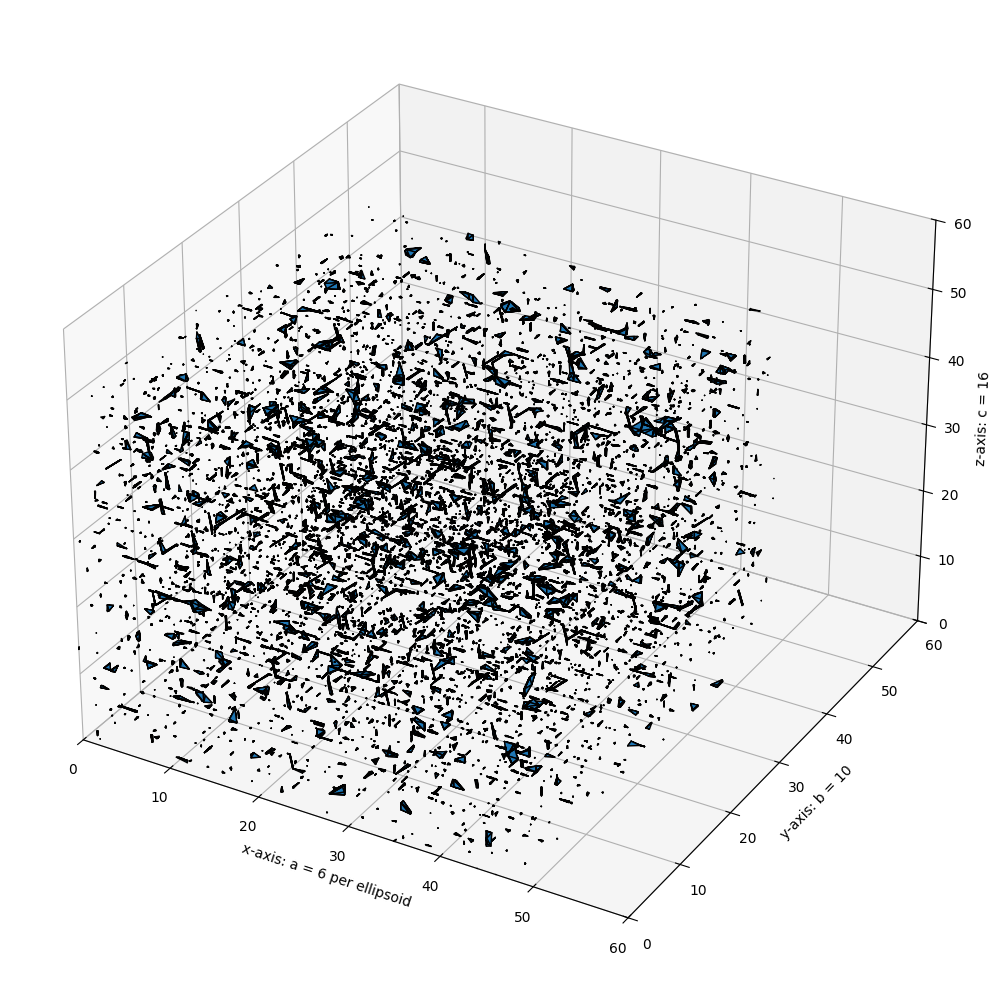

In [34]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 60) 
ax.set_ylim(0, 60)  
ax.set_zlim(0, 60)  
plt.tight_layout()
plt.show()

In [24]:
# Volume data
volume_data = np.random.rand(50, 50, 50)

# Isosurface value
iso_value = 0.5

# Extract the isosurface
vertices, faces, normals, values = measure.marching_cubes(volume_data, iso_value)

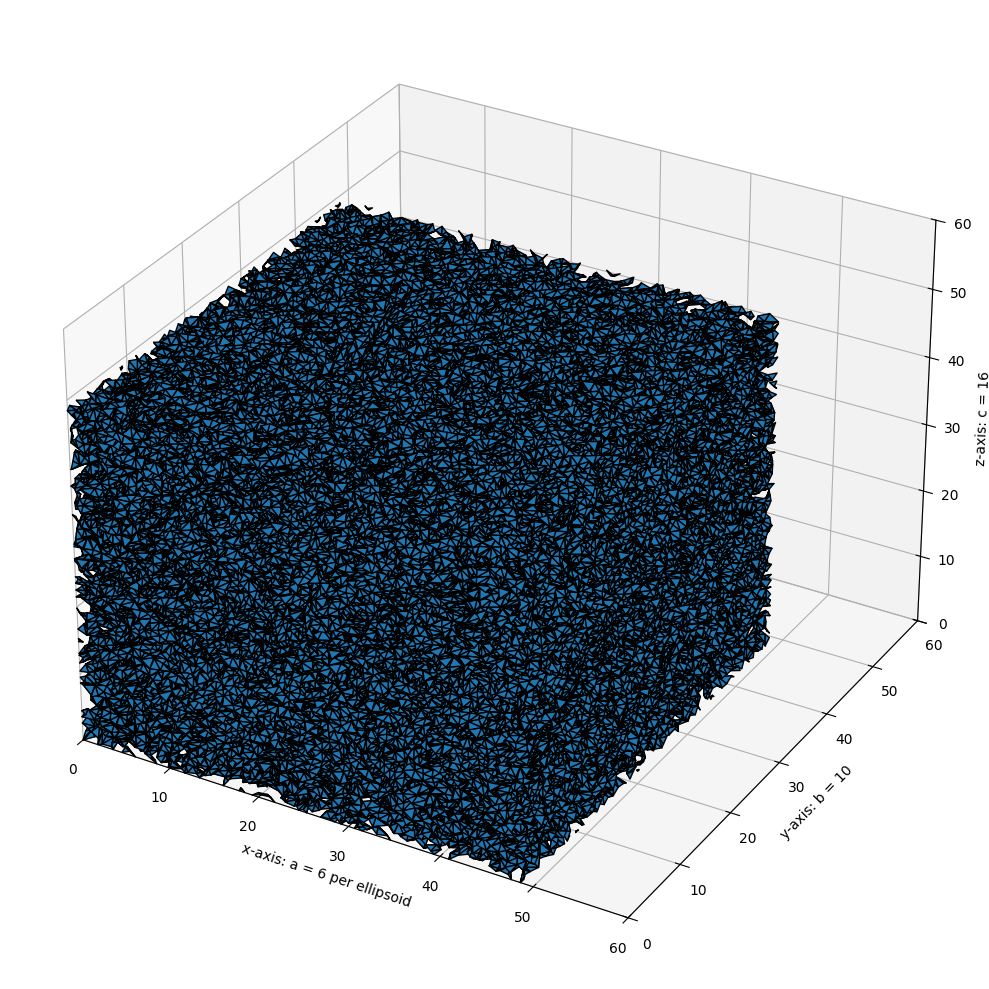

In [25]:
# Display resulting triangular mesh using Matplotlib. This can also be done
# with mayavi (see skimage.measure.marching_cubes docstring).
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Fancy indexing: `verts[faces]` to generate a collection of triangles
mesh = Poly3DCollection(vertices[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)

ax.set_xlabel("x-axis: a = 6 per ellipsoid")
ax.set_ylabel("y-axis: b = 10")
ax.set_zlabel("z-axis: c = 16")

ax.set_xlim(0, 60) 
ax.set_ylim(0, 60)  
ax.set_zlim(0, 60)  
plt.tight_layout()
plt.show()

Given binary volume data with values of 0 and 1, an isosurface value of 0.5 would be perfect. This value slices right between 0 and 1, allowing the algorithm to detect the boundary where the data changes from 0 to 1. 